# Scikit-learn: a tutorial

<img width="40%" src="images/machine_learning_2x.png">

This is a brief tutorial on scikit-learn, which I crafted from online material, in particular from the [scikit-learn webpage](https://scikit-learn.org/stable/).

Scikit-learn is a python package that implements a very wide set of tools useful for machine learning. (Credits to the cartoon go to the wonderful [XKCD site](https://xkcd.com/))

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## What can we do with scikit-learn?

* [Data preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)
* [Dimensionality reduction of large datasets](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
* [Supervised learning for both classification and regression](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
* [Unsupervised learning and clustering](https://scikit-learn.org/stable/unsupervised_learning.html)
* [Model selection](https://scikit-learn.org/stable/model_selection.html#model-selection)
* [Composing processing steps together as Pipelines](https://scikit-learn.org/stable/modules/compose.html)

The main strength the scikit-learn API has is its consistency: [all estimators, transformers, etc share the same main design](https://scikit-learn.org/stable/glossary.html#glossary-estimator-types), enabling very flexible compositions of different machine learning algorithms.

# Subjects that we will go through in this tutorial

1. **Datasets**: loading, fetching and making toy example datasets with the `sklearn.datasets` module.
2. **Preprocessing**: spliting into training and test sets, scaling the data values through different criteria.
3. **Fitting supervised learning models**: the common API for all scikit-learn models.
4. **Metrics of goodness of fit**: the common API for all metrics on goodness of fit.
5. **Cross validation and parameter selection**: tools for efficient cross validation of models on datasets and how these can be used to get the __best__ fitting parameters.
6. **Dimensionality reduction basics**: A small view of `sklearn.decomposition` and how to reduce features dimensionality.
7. **Processing pipes**: Putting everything together in data processing pipes.

---

### Datasets
Scikit-learn comes with some built-in datasets for use. These are in the module `dataset`.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

Each datasets contains input data (the `data` key in the dictionary), targets, and input and target names. It may contain also additional information, e.g. raw images in case of image datasets. Pandas dataframes can be used as well.

These are the attibutes of digits  ['DESCR', 'data', 'images', 'target', 'target_names']


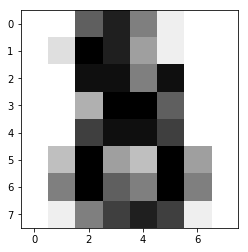

In [3]:
digits = datasets.load_digits()
print("These are the attibutes of digits ", dir(digits))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r) 

In [4]:
print(type(digits.images[-1]))
#these are 8x8 pixels images . 
print(digits.images.shape)
print(digits.images[-1])


<class 'numpy.ndarray'>
(1797, 8, 8)
[[ 0.  0. 10. 14.  8.  1.  0.  0.]
 [ 0.  2. 16. 14.  6.  1.  0.  0.]
 [ 0.  0. 15. 15.  8. 15.  0.  0.]
 [ 0.  0.  5. 16. 16. 10.  0.  0.]
 [ 0.  0. 12. 15. 15. 12.  0.  0.]
 [ 0.  4. 16.  6.  4. 16.  6.  0.]
 [ 0.  8. 16. 10.  8. 16.  8.  0.]
 [ 0.  1.  8. 12. 14. 12.  1.  0.]]


### How should the data be arranged to be able to work with scikit-learn
* The training data must be a 2-D array with shape `(n_samples, n_features)`
* In supervised learning contexts, the must be a 1-D array with `(n_samples,)` elements.

Datasets in scikit-learn consist of the input array and of the target vector, passed separately to functions (and stored in separate variables). Input data is a numpy array with two dimensions. Rows contain single data points, columns cointain features.

In [5]:
# we can in principle reshape the image to trasnform in into a dataset
#this transforms a single input point in a row
print(digits.images[-1].reshape((1, -1))) 
# this transforms the whole input images into a row
digits.images.reshape((digits.images.shape[0], -1))

[[ 0.  0. 10. 14.  8.  1.  0.  0.  0.  2. 16. 14.  6.  1.  0.  0.  0.  0.
  15. 15.  8. 15.  0.  0.  0.  0.  5. 16. 16. 10.  0.  0.  0.  0. 12. 15.
  15. 12.  0.  0.  0.  4. 16.  6.  4. 16.  6.  0.  0.  8. 16. 10.  8. 16.
   8.  0.  0.  1.  8. 12. 14. 12.  1.  0.]]


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
#though the dataset is already prepared!
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


# Exercises
1. Find the list of the available datasets
2. Fetch the boston housing dataset and create a pandas.DataFrame with it (add the target values as a column in the DataFrame)
---

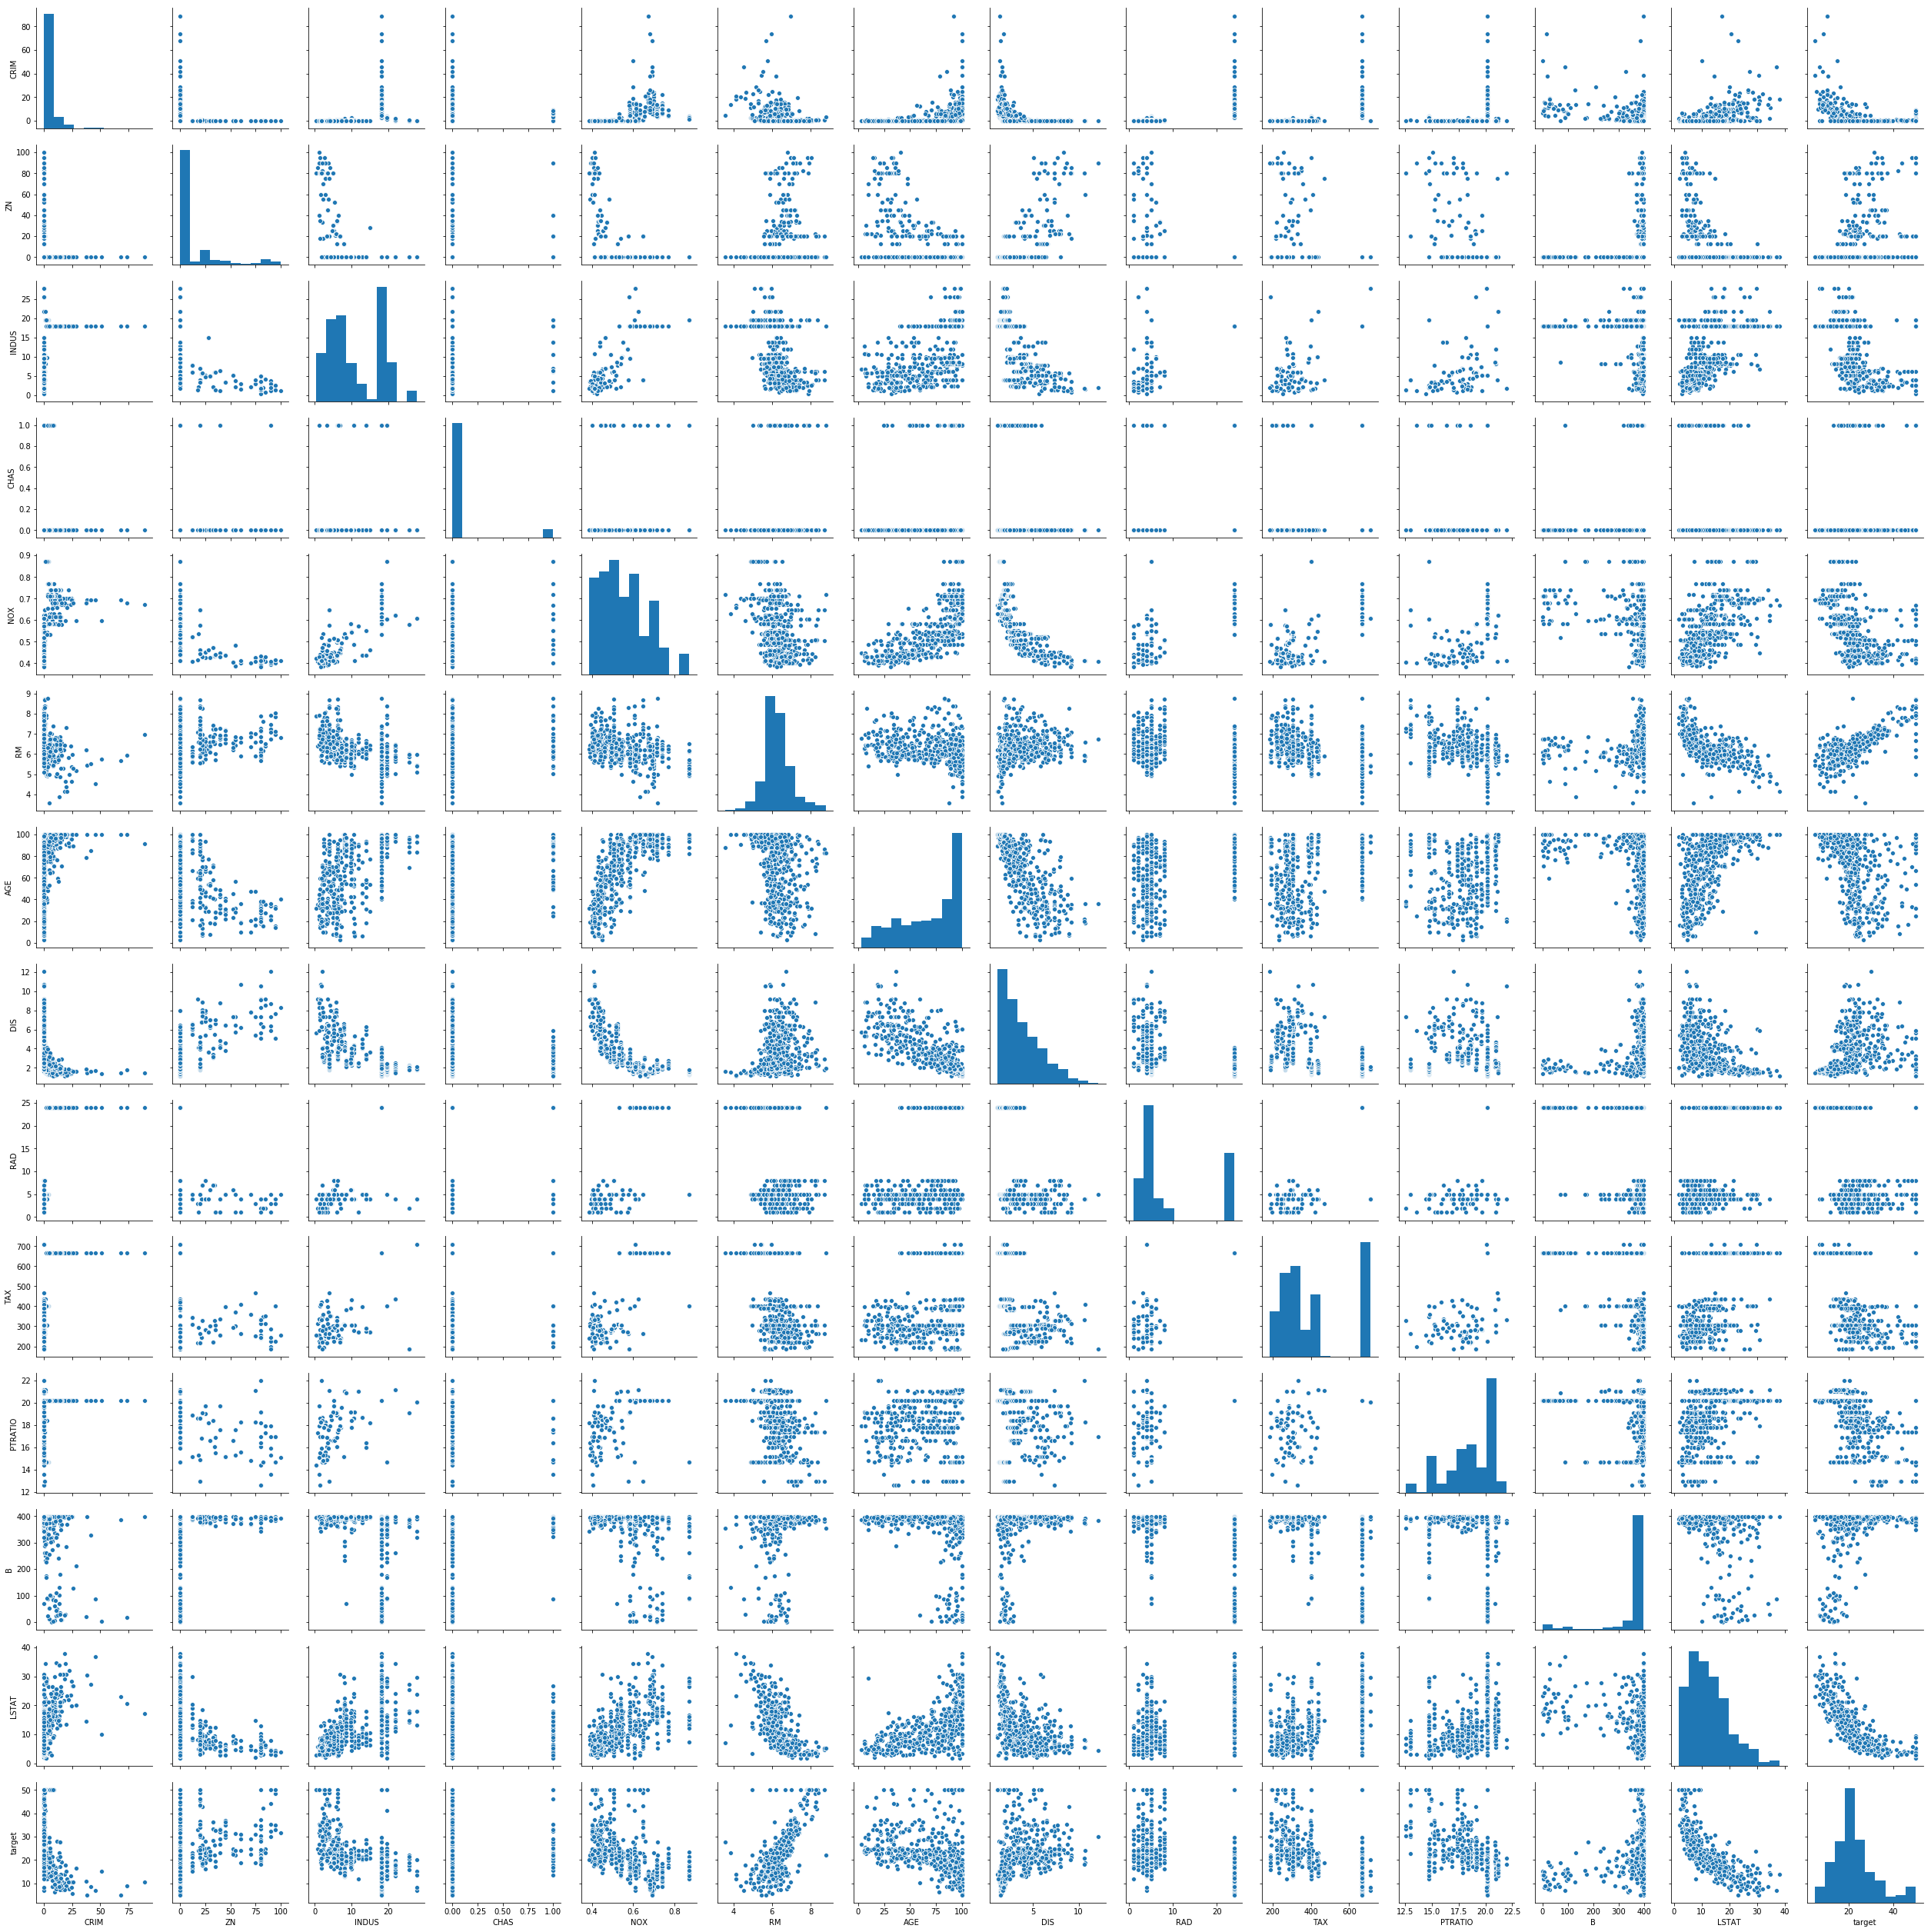

In [7]:
# 2
boston = datasets.load_boston()
import pandas as pd
df = pd.DataFrame(data=boston.data,
                  columns=boston.feature_names)
df['target'] = boston.target
import seaborn as sns
sns.pairplot(data=df)

#### Basic Operations on  Datasets
A cool thing of scikit-learn is that is has functions to perform routine operations on datasets, including: 
* generating Test and Train datasets. The relevant function is `train_test_split` from the module `model_selection`.
* Standardising input data. The function scale of the module `preprocessing` provides a quick and easy way to perform this operation on a single array-like dataset.


In [8]:
iris.data.shape

(150, 4)

In [9]:
from sklearn.model_selection import train_test_split

#default test_size is 0.25
#random state is the seed of the random sampler used to generate test and train datasets
#data and target must have the same number of rows, i.e. same first coordinate of shape
print(iris.data.shape,iris.target.shape)
iris_X_train, iris_X_test, iris_y_train, iris_y_test = \
    train_test_split(iris.data, iris.target, random_state=0)

print(iris_X_train.shape, iris_X_test.shape)
print(iris_y_test.shape)
np.unique(iris_y_test)

(150, 4) (150,)
(112, 4) (38, 4)
(38,)


array([0, 1, 2])

A very important parameter of `train_test_split` is `stratify`. If left as `None`, `train_test_split` will uniformly randomly select rows to use in the train and test sets. This criteria may produce unbalanced sets (i.e. the label distribution may be different between the train and test sets). For very big datasets, or datasets are well balanced to begin with, this is usually not a problem; but when the datasets are smaller, this can have serious consequences. For example, it may happen that some labels can be completely abscent in the train or test set, and the learnt models will work poorly.

If you supply an array to `stratify`, the train and test split is done on the rows corresponding to each of the unique values of the array.

In [10]:
# First lets see the label distribution for the train and test sets without stratification.
# np.unique(iris.target, return_counts=True)
iris_X_train, iris_X_test, iris_y_train, iris_y_test = \
    train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
print('Without stratify')
a = {'original': iris.target,
     'train': iris_y_train,
     'test': iris_y_test}
for kind, vals in a.items():
    print(kind)
    print({label: c / len(vals) for label, c in zip(*np.unique(vals, return_counts=True))})
    print('---')

# Now lets see what happens when we use stratify

iris_X_train2, iris_X_test2, iris_y_train2, iris_y_test2 = \
    train_test_split(iris.data, iris.target, test_size=0.4, random_state=0,
                     stratify=iris.target)
a = {'original': iris.target,
     'train': iris_y_train2,
     'test': iris_y_test2}
print('\nUsing stratify')
for kind, vals in a.items():
    print(kind)
    print({label: c / len(vals) for label, c in zip(*np.unique(vals, return_counts=True))})
    print('---')

Without stratify
original
{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333}
---
train
{0: 0.37777777777777777, 1: 0.3, 2: 0.32222222222222224}
---
test
{0: 0.26666666666666666, 1: 0.38333333333333336, 2: 0.35}
---

Using stratify
original
{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333}
---
train
{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333}
---
test
{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333}
---


# Exercise

1. Load the digits dataset, and split it in train and test sets (20% of the data must be in the test), stratified according to the target value.

---

In [11]:
digits = datasets.load_digits()
print(digits.target.shape)
train_X, test_X, train_y, test_y = train_test_split(
    digits.data,
    digits.target,
    stratify=digits.target,
    test_size=0.2,
)
print(train_X.shape, test_X.shape)
for y in [train_y, test_y]:
    labels, cs = np.unique(y, return_counts=True)
    label_probs = cs / len(y)
    print(label_probs)

(1797,)
(1437, 64) (360, 64)
[0.09881698 0.10090466 0.09881698 0.10160056 0.10090466 0.10160056
 0.10090466 0.09951287 0.0967293  0.10020877]
[0.1        0.10277778 0.09722222 0.10277778 0.1        0.1
 0.1        0.1        0.09722222 0.1       ]


#### Transformer API and Preprocessing
Scikit-learn has some API/ interfaces which are very useful to automate the learning process.
As data preprocessing has an important role in learning - typically dataset are standardised or normalised in some way - there several classes implementing the Transformer API. 

The two relevant methods of a transformer object are `fit()` and `transform()`. The first one is used to train the transformer, e.g. define the standardisation for each feature, the second one to apply the transformation to novel data. Transformer objects can be trained on the train datasets and then applied to test datasets, hence they should be the methods of choice.  

Data preprocessing is usually performed through the `Scaler` objects, which are of several types:
* `StandardScaler` performs classic standardisation;
* `MinMaxScaler` normalises data into [0,1], where 0 is the minimum and 1 is the maximum of each feature, but different ranges can be specified as well;
* `MaxAbsScaler` divides each feature for the absolute value, hence data is scaled in [-1,1];
* `RobustScaler` deals better with data with outliers, as it removes the median and scales the data according to the quantile range;

Other methods perform non-linear transformations:
* `QuantileTransformer` performs a non-linear transformation using quantiles. Better for outliers, but being non-linear, it breaks the correlation. 
* `Normalizer` scales individual samples to have unit norm. 

In [12]:
from sklearn import preprocessing

iris_X_scaled = preprocessing.scale(iris_X_train)
print("Non standardised\n",iris_X_train[:5,:])
print("Standardised\n",iris_X_scaled[:5,:])

Non standardised
 [[6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]]
Standardised
 [[ 0.18206758  0.71103882  0.45664061  0.55799544]
 [-1.17402201  0.00522823 -1.10334891 -1.19530695]
 [-0.04394735 -0.93585257  0.77939706  0.9337031 ]
 [-0.26996228 -0.93585257  0.29526238  0.18228779]
 [-0.26996228 -0.46531217 -0.02749407  0.18228779]]


In [13]:
scaler = preprocessing.StandardScaler().fit(iris_X_train)
print(iris_X_train[:5])
iris_X_scaled = scaler.transform(iris_X_train)
print(np.mean(iris_X_scaled, axis=0))
print(np.std(iris_X_scaled, axis=0))
iris_X_test_scaled = scaler.transform(iris_X_test)

print("Non standardised\n",iris_X_test[:5,:])
print("Standardised\n",iris_X_test_scaled[:5,:])
print(np.std(iris_X_test_scaled, axis=0))

[[6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]]
[ 3.89811640e-16 -4.34837351e-16 -7.64820306e-16 -4.63826508e-16]
[1. 1. 1. 1.]
Non standardised
 [[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
Standardised
 [[-0.04394735 -0.70058237  0.77939706  1.55988252]
 [ 0.18206758 -2.11220356  0.1876769  -0.19341987]
 [-0.38296975  2.59320041 -1.21093439 -1.19530695]
 [ 1.65116464 -0.46531217  1.42490997  0.80846721]
 [-0.94800707  0.71103882 -1.15714165 -1.19530695]]
[0.82128262 1.03800709 0.85260459 0.86665485]


In [14]:
scaler = preprocessing.MinMaxScaler().fit(iris_X_train)
iris_X_scaled = scaler.transform(iris_X_train)
iris_X_test_scaled = scaler.transform(iris_X_test)

print("Non standardised\n",iris_X_test[:5,:])
print("Standardised\n",iris_X_test_scaled[:5,:])

Non standardised
 [[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
Standardised
 [[0.41666667 0.27272727 0.68965517 0.95833333]
 [0.47222222 0.         0.5        0.375     ]
 [0.33333333 0.90909091 0.05172414 0.04166667]
 [0.83333333 0.31818182 0.89655172 0.70833333]
 [0.19444444 0.54545455 0.06896552 0.04166667]]


In [15]:
#Each scaler has some options, use help or refer to scikit-learn manual!
help(preprocessing.MinMaxScaler) 

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, i.e. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : boolean, optional, default True
 |      Set to False to perform inplace row normalization and avoid a
 |   

# Exercise

1. Fetch the california housing dataset. Grab the 'MedInc' and 'AveOccup' feature data values. Plot the joint distribution after scaling them using the `StandardScaler`, the `QuantileTransformer` and the `Normalizer`. For a thorough comparison you can look up [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).

---

### Supervised Learning
Regression and classification in scikit-learn follow a [similar pattern](https://scikit-learn.org/stable/glossary.html#class-apis-and-estimator-types). Different methods are based on instances of the `Estimator` class, which provides methods to fit the estimator - `fit()`, to predict on new data - `predict()`, and to score the model - `score()`.   

We will start with an example on linear regression, on a diabetis dataset. The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measured on 442 patients, and an indication of disease progression after one year.

For linear regression, there is the module `linear_model`, which has several implementation of linear regression, the basic one and some regularised versions. 


In [16]:
# preparing the dataset
diabetes = datasets.load_diabetes()
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test \
    = train_test_split(diabetes.data, diabetes.target, random_state=0)
scaler = preprocessing.StandardScaler().fit(diabetes_X_train)   
diabetes_X_train = scaler.transform(diabetes_X_train)
# Note that we fit the scaler on the training data and transform the test data
# This helps prevent a phenomenon called leakage https://scikit-learn.org/stable/glossary.html#term-leakage
diabetes_X_test = scaler.transform(diabetes_X_test)

In [18]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(diabetes_X_train, diabetes_y_train)
print(regressor.coef_)
print("Explained variance score:", regressor.score(diabetes_X_test, diabetes_y_test))

[ -2.08201439  -9.93774758  28.8548248   14.33603969 -26.52011217
  12.38436283  -0.42239104   6.59599005  34.458465     1.41463977]
Explained variance score: 0.35940090989715545


The explained variance regression score measures the fraction of variance which is captured by the regression models. 
If yp is the estimated target output, and y the corresponding (correct) target output, and Var is the Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$$explained\_variance\left(y,\hat{y}\right) = 1 - \frac{Var\left[y-\hat{y}\right]}{Var[y]}$$

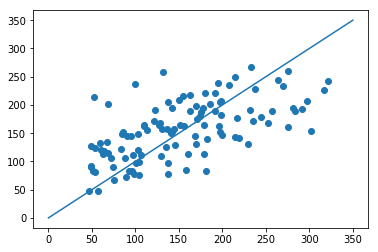

In [19]:
#We can use predict on a matrix, and get a vector of predictions. 
y_predict = regressor.predict(diabetes_X_test)
plt.figure()
plt.scatter(diabetes_y_test,y_predict)
plt.plot(np.linspace(0,350,100),np.linspace(0,350,100))


In the module `linear_model`, we have several linear classifiers, including some that are regularised, in particular `Ridge` and `Lasso` regression. These can be used similarly to the linear classifier above, 

Explained variance score: 0.35920949931140134


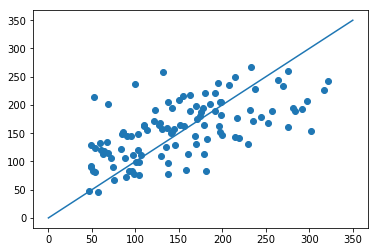

In [20]:
regressor = linear_model.Ridge(alpha=0.1)
regressor.fit(diabetes_X_train, diabetes_y_train)

print("Explained variance score:", regressor.score(diabetes_X_test, diabetes_y_test))

y_predict = regressor.predict(diabetes_X_test)
plt.figure()
plt.scatter(diabetes_y_test,y_predict)
plt.plot(np.linspace(0,350,100),np.linspace(0,350,100))

Both Ridge and Lasso regression depend on a coefficient of regularization, which should be estimated in the learning process. Scikit-learn exposes methods that do ridge/lasso regression and cross-validation in a single step: `RidgeCV` and `LassoCV` (there are more CV methods for Lasso, see the documentation).

Best alpha: 1.023292992280754
Explained variance score: 0.35573555529892387


/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


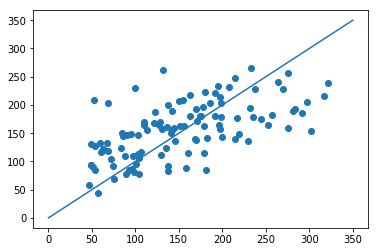

In [21]:
regressor = linear_model.LassoCV(alphas=np.logspace(0.01,10,10))
regressor.fit(diabetes_X_train, diabetes_y_train)
print("Best alpha:",regressor.alpha_)
print("Explained variance score:", regressor.score(diabetes_X_test, diabetes_y_test))

y_predict = regressor.predict(diabetes_X_test)
plt.figure()
plt.scatter(diabetes_y_test,y_predict)
plt.plot(np.linspace(0,350,100),np.linspace(0,350,100))

### Exercises
1. Build a [Bayesian ridge](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression) regression model (available as `sklearn.linear_models.BayesianRidge`) and fit the diabetes dataset with it.
2. What is the explained variance score you get with it?

Explained variance score: 0.3590495264274862


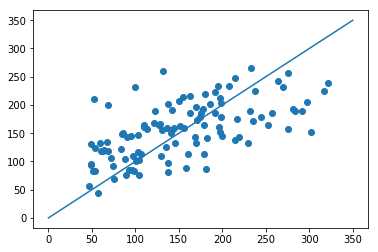

In [25]:
regressor = linear_model.BayesianRidge()
regressor.fit(diabetes_X_train, diabetes_y_train)
print("Explained variance score:", regressor.score(diabetes_X_test, diabetes_y_test))

y_predict = regressor.predict(diabetes_X_test)
plt.figure()
plt.scatter(diabetes_y_test,y_predict)
plt.plot(np.linspace(0,350,100),np.linspace(0,350,100))

### Cross validation
Setting regularisation parameters or controlling model complexity in a frequentist setting can be achieved using cross validation. Scikit learn implements a nice interface for cross validation and to optimize hyperparameters. 

To fully exploit cross validation, we need to use cross validation iterators, available in the module `sklearn.model_selection`. These are objects that generate the proper splits of the train dataset. Examples are:
* `KFold` is for k fold cross validation, use `n_splits` to set the number of splits.
* `RepeatedKFold`, like k-fold, but repeated `n_repeats` times. By setting `random_state` we can replicate experiments. 
* `LeaveOneOut` is for leave one out  (LOO) cross validation. In terms of accuracy, LOO often results in high variance as an estimator for the test error, and 5- or 10- fold cross validation should be preferred to LOO, though if the learning curve is steep for the training size in question, then 5- or 10- fold cross validation can overestimate the generalization error.
* `ShuffleSplit` generates a user defined number of independent train / test dataset splits, with the test size specified by the option `test_size`. Samples are first shuffled and then split into a pair of train and test sets.
It is possible to control the randomness for reproducibility of the results by explicitly seeding the `random_state` pseudo random number generator.
* `StratifiedKFold` it's like `KFold`, but using stratified sampling, i.e. it preserves the percentage of samples of each target class as the complete set.

The previous methods work with i.i.d. data, an assumption violated if the underlying generative process yield groups of dependent samples (i.e. medical data collected from multiple patients, with multiple samples taken from each patient). In this case, if we know the group for each data point, we can use `GroupKFold` or `LeaveOneGroupOut`. See the Scikit-learn [documentation](http://scikit-learn.org/stable/modules/cross_validation.html) for further details. 



In [28]:
from sklearn import model_selection
kf_cv = model_selection.KFold(n_splits=2)
for train, test in kf_cv.split(['a','b','c','d']):
    print("train set = {}; test_set = {}".format(train, test))
#see the KFold outputs indices of train and test sets. 

train set = [2 3]; test_set = [0 1]
train set = [0 1]; test_set = [2 3]


In order to perform cross validation on a specific estimator, we can use the `cross_val_score` function, which takes as input:
1. an estimator
2. train and test datasets
3. a cross_validation iterator, with the option `cv`
4. a scoring criterion, with the option `scoring`.

The method computes the scores for a fixed value of hyperparameters!

The function `cross_val_predict` has a similar interface to `cross_val_score`, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set. Only cross-validation strategies that assign all elements to a test set exactly once can be used (otherwise, an exception is raised).

In [33]:
scoring = ['explained_variance', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
regressor = linear_model.Ridge(alpha=0.1)
kf_cv = model_selection.KFold(n_splits=5)


scores = model_selection.cross_val_score(regressor, diabetes.data, diabetes.target, scoring='r2', cv=kf_cv)
print("SV score:", scores.mean(),"±",scores.std())

regressor = linear_model.Ridge(alpha=0.1)
prediction = model_selection.cross_val_predict(regressor, diabetes.data, diabetes.target, cv=kf_cv)
for i in range(5):
    print("predicted:",prediction[i],"- true",diabetes.target[i])

SV score: 0.47988368563401884 ± 0.047263511492239334
predicted: 199.36071746534853 - true 151.0
predicted: 70.04088214670878 - true 75.0
predicted: 172.36396726559903 - true 141.0
predicted: 160.9666310530091 - true 206.0
predicted: 127.41797122030346 - true 135.0


In [32]:
scores

array([0.41127253, 0.51847502, 0.49219224, 0.44044818, 0.53703047])

##### Optimizing hyperparameters with cross-validation
In order to optimize parameters, we can rely on built-in methods in the `model_selection` module, which perform either grid search or random search. The first explores all hyperparameters combinations on a  grid (can explode computationally), whereas the second performs random search, exploring only a fixed subset of random points. 

Which are the hyperparameters of an estimator? We can get them using `estimator.get_params()` method. 

A search consists of:
1. an estimator (regressor or classifier such as `sklearn.svm.SVC()`);
2. a parameter space, specified as a dictionary or list of dictionaries;
3. a cross-validation scheme; 
4. a score function.
5. a method for searching or sampling candidates;

`GridSearchCV` performs the grid search, while `RandomizedSearchCV` does the randomised search, and requires also the specification of a computational budget using the `n_iter` options. The option `n_jobs=-1` uses maximum number of parallel threads/ processes to perform the CV search. 

In [40]:
# 1. The estimator
regressor = linear_model.Ridge()
# 2. The parameter space (note that it is discrete!)
parameters = {'alpha':np.logspace(-5,2,8)}
# 3. The cross-validation scheme
kf = model_selection.KFold(n_splits=5)
# 4. The score function or its name
score = 'r2'
# 5. The method for searching candidates
clf = model_selection.GridSearchCV(regressor,
                                   parameters,
                                   cv=kf,
                                   scoring=score,
                                   n_jobs=-1)
# clf is a meta-estimator because builds estimates
# combining other estimates, in our case it selects the
# best fitting one
clf.fit(diabetes.data, diabetes.target)
print(clf.best_params_)
print(clf.get_params())

{'alpha': 0.0001}
{'cv': KFold(n_splits=5, random_state=None, shuffle=False), 'error_score': 'raise-deprecating', 'estimator__alpha': 1.0, 'estimator__copy_X': True, 'estimator__fit_intercept': True, 'estimator__max_iter': None, 'estimator__normalize': False, 'estimator__random_state': None, 'estimator__solver': 'auto', 'estimator__tol': 0.001, 'estimator': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001), 'fit_params': None, 'iid': 'warn', 'n_jobs': -1, 'param_grid': {'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': 'warn', 'scoring': 'r2', 'verbose': 0}


/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
clf.cv_results_

/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lpaz/anaconda3/lib/python3.6/site

{'mean_fit_time': array([0.00062361, 0.00058169, 0.00058889, 0.00055246, 0.00050874,
        0.00044055, 0.00034795, 0.00034852]),
 'mean_score_time': array([0.00027366, 0.00027275, 0.00031209, 0.00024934, 0.00023885,
        0.00022359, 0.00018177, 0.00018163]),
 'mean_test_score': array([ 0.48229043,  0.4822946 ,  0.48227858,  0.48140292,  0.47981577,
         0.41004415,  0.13821794, -0.00477912]),
 'mean_train_score': array([0.5195063 , 0.51950552, 0.51944452, 0.51813672, 0.51313276,
        0.4351973 , 0.1626644 , 0.02237245]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-05},
  {'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1.0},
  {'alpha': 10.0},
  {'alpha': 100.0}],
 'rank_test_score': array([2, 1, 3, 4, 5, 6, 7, 8], dtype=int32),
 'split0_test

In [41]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.5f (+/-%0.3f) for %r" % (mean, std * 2, params))

0.48229 (+/-0.099) for {'alpha': 1e-05}
0.48229 (+/-0.098) for {'alpha': 0.0001}
0.48228 (+/-0.098) for {'alpha': 0.001}
0.48140 (+/-0.097) for {'alpha': 0.01}
0.47982 (+/-0.095) for {'alpha': 0.1}
0.41004 (+/-0.090) for {'alpha': 1.0}
0.13822 (+/-0.072) for {'alpha': 10.0}
-0.00478 (+/-0.073) for {'alpha': 100.0}


In [42]:
from scipy import stats
regressor = linear_model.Ridge()
# note, for randomised search we pass a random number
# generator, like the ones that come with scipy.stats
parameters = {'alpha': stats.expon(scale=0.001)}
score = 'r2'
kf = model_selection.KFold(n_splits=5)
clf = model_selection.RandomizedSearchCV(regressor, parameters,cv=kf,scoring=score,n_jobs=-1,n_iter = 10)
clf.fit(diabetes.data, diabetes.target)
print(clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.5f (+/-%0.3f) for %r" % (mean, std * 2, params))


{'alpha': 0.0003519006681761522}
0.48229 (+/-0.098) for {'alpha': 0.0007397777192357177}
0.48229 (+/-0.098) for {'alpha': 0.0006984931864329862}
0.48230 (+/-0.098) for {'alpha': 0.0003519006681761522}
0.48229 (+/-0.098) for {'alpha': 7.483814991252341e-05}
0.48230 (+/-0.098) for {'alpha': 0.0006266854892348438}
0.48217 (+/-0.098) for {'alpha': 0.0022216701388628546}
0.48227 (+/-0.098) for {'alpha': 0.001145184100209295}
0.48220 (+/-0.098) for {'alpha': 0.0019104898646266414}
0.48220 (+/-0.098) for {'alpha': 0.0019247896937288399}
0.48230 (+/-0.098) for {'alpha': 0.0001945017285859507}


### Classification
Classification is a task similar to regression in Scikit-learn, we just need to instantiate the proper objects. 
`LogisticRegression` is probably the most famous classifier, and in Scikit-learn comes with a built-in regularization L2 regularization. `C` here control the regularization strenght, but the larger it is the less regularization! L1 penalty can be set by `penalty='l1'` option.

In [44]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)
print("Classification accuracy:",logistic.score(iris_X_test,iris_y_test))

Classification accuracy: 0.9666666666666667


/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


There are many classification algorithms in Scikit-learn, like nearest neighbours, decision trees, support vector machines, and many others. 

In [45]:
from sklearn import neighbors

neigh_class = neighbors.KNeighborsClassifier(n_neighbors=5, weights="distance")
neigh_class.fit(iris_X_train, iris_y_train)
print("Classification accuracy:",neigh_class.score(iris_X_test,iris_y_test))

Classification accuracy: 0.95


In [46]:
from sklearn import svm

svc = svm.SVC(kernel='linear', C = 1, gamma='auto')
svc.fit(iris_X_train, iris_y_train)    
print("Classification accuracy (linear):", svc.score(iris_X_test,iris_y_test))

svc = svm.SVC(kernel='poly', degree=3, gamma='auto')
svc.fit(iris_X_train, iris_y_train)    
print("Classification accuracy (poly):", svc.score(iris_X_test,iris_y_test))


svc = svm.SVC(kernel='rbf',C=1.0, gamma='auto')
svc.fit(iris_X_train, iris_y_train)    
print("Classification accuracy (rbf):", svc.score(iris_X_test,iris_y_test))

Classification accuracy (linear): 0.9666666666666667
Classification accuracy (poly): 0.9666666666666667
Classification accuracy (rbf): 0.95


When specifying a parameter space for grid (or random) search, we can also pass a list of dictionaries, like in the following set of parameters for SVC. 
```
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
```

### Exercise
1. Run cross validation with SVM on rbf and poly kernel, trying to improve over basic results, playing with the regulariser `C`.

---

In [79]:
# 1. The estimator
regressor = svm.SVC()
# 2. The parameter space (note that it is discrete!)
Cs = np.logspace(-3, 2, 10)
gammas = np.logspace(-3, 1, 10)
parameters = [
    dict(C=Cs, kernel=['poly'], degree=[1, 2, 3, 4]),
    dict(C=Cs, gamma=gammas, kernel=['rbf']),
]
# 3. The cross-validation scheme
kf = model_selection.KFold(n_splits=5)
# 4. The score function or its name
score = 'precision_micro'
# 5. The method for searching candidates
clf = model_selection.GridSearchCV(regressor,
                                   parameters,
                                   cv=kf,
                                   scoring=score,
                                   n_jobs=-1)

clf.fit(iris.data, iris.target)
print('Best params = {}'.format(clf.best_params_))
print('Best {} = {}'.format(score, clf.best_score_))

Best params = {'C': 0.5994842503189409, 'degree': 2, 'kernel': 'poly'}
Best precision_micro = 0.9466666666666667


/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Model Scoring
Scikit-learn implements many different ways of scoring models, both for regression, classification, clustering, etc. 
You can find a detailed list and discussion in the [online reference](http://scikit-learn.org/stable/modules/model_evaluation.html).

* **Estimator score** method: each estimators has a default score method, see each estimator’s documentation.
* **Scoring parameter**: cross-validation rely on an internal scoring strategy. One can pass a predefined Scorer object, or a custom scorer, maybe obtained from a metrics. 
* **Metric functions**: the `metrics` module implements functions assessing prediction error for specific purposes. 

In the list of predefined scores, and also in metrics, particularly for multi-class classification, there are some attributes that govern how binary classification is used to score the multi-class case (e.g. `f1`,`f1_micro`,`f1_macro`,`f1_weighted`,`f1_samples`).
* `macro` simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.
* `weighted` accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.
* `micro` gives each sample-class pair an equal contribution to the overall metric (except as a result of sample-weight). Rather than summing the metric per class, this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.
* `samples` applies only to multilabel problems. It does not calculate a per-class measure, instead calculating the metric over the true and predicted classes for each sample in the evaluation data, and returning their (sample_weight-weighted) average.



In [69]:
from sklearn import metrics

clf = svm.SVC(kernel='linear', C=1)
scores = model_selection.cross_val_score(clf, iris.data, iris.target, cv=10)
print("score:","accuracy",":",scores.mean(),"±",scores.std())

scorers = ['precision_macro','recall_macro','f1_macro']
for sc in scorers:
    scores = model_selection.cross_val_score(clf, iris.data, iris.target, cv=10, scoring=sc)
    print("score:",sc,":",scores.mean(),"±",scores.std())

score: accuracy : 0.9733333333333334 ± 0.04422166387140532
score: precision_macro : 0.9793650793650794 ± 0.0331438301870176
score: recall_macro : 0.9733333333333333 ± 0.04422166387140534
score: f1_macro : 0.9726430976430975 ± 0.0456897053283


##### Make your own scorer
An alternative to predifined scorer objects is to generate a custom one, likely starting from a function in the  module `sklearn.metrics`. We can convert them using the `make_scorer` method. Note that the following convention on functions of `sklearn.metrics` applies:
* functions ending with `_score` return a value to maximize, the higher the better.
* functions ending with `_error` or `_loss` return a value to minimize, the lower the better. When converting into a scorer object, set the `greater_is_better` parameter to `False`.

As an example we will craft a F-beta scorer, with beta equal to 2. The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of precision in the combined score. beta < 1 lends more weight to precision, while beta > 1 favors recall (beta -> 0 considers only precision, beta -> inf only recall). This works for a two class problem.

In [70]:
ftwo_scorer = metrics.make_scorer(metrics.fbeta_score, beta=2)
grid = model_selection.GridSearchCV(svm.SVC(kernel='linear'),
                                    cv=5,
                                    param_grid={'C': np.logspace(-1,3,5)},
                                    scoring=ftwo_scorer)
#make a random dataset for testing
X, y = datasets.make_classification(n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
clf = grid.fit(X_train,y_train)
clf.fit(X_train,y_train)
print("Linear SVM, score:",clf.score(X_test,y_test))
print("Linear SVM, best params:",clf.best_params_)


Linear SVM, score: 0.9375
Linear SVM, best params: {'C': 0.1}


In [72]:
# this is a nice summary for classification
target_names = ['class 0', 'class 1']
print(metrics.classification_report(y_test, clf.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.89      0.93        35
     class 1       0.86      0.96      0.91        25

   micro avg       0.92      0.92      0.92        60
   macro avg       0.91      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



### Dimensionality Reduction
When working with high-dimensional data, it can be a clever idea to try to reduce dimensionality. The most common approach is PCA, which finds the best linear projection of data (i.e. the one explaining most of the variance).  

PCA in Scikit-learn is in the module `decomposition`, and it can be used to transform/ preprocess data (also in pipelines, see below). 

In [78]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 8,
                        whiten=True)
pca.fit(diabetes_X_train)
print("Explained variance:",pca.explained_variance_)
print("Noise variance:",pca.noise_variance_)


regressor = linear_model.Ridge(alpha=0.1)
regressor.fit(pca.transform(diabetes_X_train),diabetes_y_train)
print("Explained variance:",regressor.score(pca.transform(diabetes_X_test),diabetes_y_test))

Explained variance: [4.15315584 1.45165929 1.19026215 0.95486802 0.6528035  0.60970791
 0.51562004 0.4155897 ]
Noise variance: 0.043318293213964645
Explained variance: 0.3498995449169452


### Pipelining
Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).

Pipeline serves two purposes here:
* **Convenience and encapsulation:** fit and predict need to be called only once on the data.
* **Joint parameter selection:** to grid search over parameters of all estimators in the pipeline at once.
* **Safety:** to avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.


In [86]:
from sklearn import pipeline

iris = datasets.load_iris()
iris_X_train, iris_X_test, iris_y_train, iris_y_test = \
    train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
estimators = [
    ('scaler', preprocessing.StandardScaler()),
    ('clf', svm.SVC(kernel='rbf', gamma=1.0, C=1.0))
]
pipe = pipeline.Pipeline(estimators)
pipe.fit(iris_X_train, iris_y_train)

y_predict = pipe.predict(iris_X_test)
print("Explained variance:",pipe.score(iris_X_test,iris_y_test))

print(metrics.classification_report(iris_y_test, y_predict, target_names=iris.target_names))

Explained variance: 0.9166666666666666
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.85      0.96      0.90        23
   virginica       0.94      0.81      0.87        21

   micro avg       0.92      0.92      0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [87]:
# To get the Pipe's parameter names and values we use get_params
pipe.get_params()

{'clf': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'clf__C': 1.0,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 1.0,
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False,
 'memory': None,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
     max_iter=-1, probability=False, rando

In [88]:
# This is the way to refer to parameters of each estimator
pipe.set_params(clf__C=10)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [91]:
#this accesses the estimator
pipe.named_steps['clf']
# use pipe.steps[0] for step 0 etc.

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [92]:
#why does this behave so strangely?
param_grid = dict(clf__C=np.linspace(0.1,2,11), clf__gamma=[0.5,1,1.5,2,2.5])
grid = model_selection.GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring = "f1_macro")
clf = grid.fit(iris_X_train,iris_y_train)
print(grid.best_params_)
clf.fit(iris_X_train,iris_y_train)
y_predict = clf.predict(iris_X_test)
print(metrics.classification_report(iris_y_test, y_predict , target_names=iris.target_names))

/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lpaz/anaconda3/lib/python3.6/s

{'clf__C': 1.2400000000000002, 'clf__gamma': 2}
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.88      0.96      0.92        23
   virginica       0.95      0.86      0.90        21

   micro avg       0.93      0.93      0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



/home/lpaz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [93]:
# The above warnings seem to happen because the train and test sets are unbalanced.

iris_X_train2, iris_X_test2, iris_y_train2, iris_y_test2 = \
    train_test_split(iris.data, iris.target, test_size=0.4, random_state=0,
                     stratify=iris.target)

param_grid = dict(clf__C=np.linspace(0.1,2,11), clf__gamma=[0.5,1,1.5,2,2.5])
grid = model_selection.GridSearchCV(pipe, param_grid=param_grid, scoring = "f1_macro",
                                    cv=5)
clf = grid.fit(iris_X_train2, iris_y_train2)
print(grid.best_params_)
y_predict = clf.predict(iris_X_test2)
print(metrics.classification_report(iris_y_test2, y_predict , target_names=iris.target_names))

{'clf__C': 1.4300000000000002, 'clf__gamma': 0.5}
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      0.95      0.95        20
   virginica       0.95      0.95      0.95        20

   micro avg       0.97      0.97      0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



##### Last but not least, the scikit-learn algorithm "cheatsheet"

<img width="100%" src="images/ml_map.png">

## Excercises

1. Fetch the california housing dataset using scikit-learn datasets module and convert it into a pandas.DataFrame. Explore the correlations between the target and the rest of the features using seaborn visualizations. Are there redundant features? What features show the largest linear correlation with target? Do you think they are the most informative features?

2. Transform the target continous values into quartile labels (discrete values that indicate if the given target value is in the lowest 25% of all values, 25 to 50 %, etc). Repeat the visual exploration with seaborn visualizations. From this visualization, can you identify features that are non-linearly correlated with the target? Are they the same features that showed the highest linear correlation too?

3. Interpretation question: Explore through visualizations the relationship between Latitude, Longitude and the continuous target value (Hint, try to also overlay the locations of San Francisco, Reno, Los Angeles, San Diego and Sacramento over the data). Is the target value homogenuously distributed across California? If there is heterogeneity, how could one exploit the knowledge of Latitude and Longitude to improve the model's predictions?
#### The California dataset is too big to use the SVC on all of it in a short time. We will work on the subset of data that is around San Francisco (37°46′00″N 122°26′00″O)

4. Get the dataset that has the Latitude and Longitude inside a box, 0.6 degrees wide, centered at San Francisco (37°46′00″N 122°26′00″O).

5. Build an SVC using linear and RBF kernels to learn the target value using only the MedInc, HouseAge and AveRooms features. Which kernel works best?

6. Repeat the same as above but using only the Population, AveOccup, Latitude and Longitude features. Which kernel works best?

7. Repeat the same as above but with all features. Which kernel works best?

---
### Hints for solutions

In [ ]:
# Help for Ex 1
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

# To get the dataset use datasets.fetch_california_housing
raw_data = datasets.fetch_california_housing()

# Create the dataframe
df = pd.DataFrame(data=raw_data['data'],
                  columns=raw_data['feature_names'])
df = df.assign(target=raw_data['target'])
print(df.head(4))
sns.pairplot(data=df)

# To explore the linear correlation, you can use the pearson
# correlation defined by np.corrcoef
plt.figure()
plt.bar(range(len(raw_data['feature_names'])),
        np.corrcoef(df.values.T)[-1, :-1])
plt.gca().set_xticks(range(len(raw_data['feature_names'])))
plt.gca().set_xticklabels(raw_data['feature_names'], rotation=60)
plt.ylabel('Pearson correlation')

In [ ]:
# Help for Ex 2
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

# To get the dataset use datasets.fetch_california_housing
raw_data = datasets.fetch_california_housing()

# To split into percentiles you can use numpy.percentile
# with digitize or just a plain sort too
target = raw_data['target']
bins = np.percentile(target, np.linspace(0, 100, 5)[1:])
bins[-1] += 1
target = np.digitize(target, bins)

# Create the dataframe
df = pd.DataFrame(data=raw_data['data'],
                  columns=raw_data['feature_names'])
df = df.assign(target=target)
print(df.head(4))

# Colorcode according to the target
sns.pairplot(data=df,
             hue='target'
            )

# To explore the linear correlation, you can use the pearson
# correlation defined by np.corrcoef
plt.figure()
plt.bar(range(len(raw_data['feature_names'])),
        np.corrcoef(df.values.T)[-1, :-1])
plt.gca().set_xticks(range(len(raw_data['feature_names'])))
plt.gca().set_xticklabels(raw_data['feature_names'], rotation=60)
plt.ylabel('Pearson correlation')

In [ ]:
# Hints for Ex 3
plt.figure(figsize=(9, 9))
sns.relplot(data=df, x='Longitude', y='Latitude', hue='target', alpha=0.4, kind='scatter')
sns.jointplot(data=df, x='Longitude', y='Latitude', kind='kde', n_levels=40)

def digitize(a, bins=10):
    a = np.asarray(a).flatten()
    m = np.min(a)
    M = np.max(a)
    bins = np.linspace(m, M, bins + 1)
    bins[-1] += 1 # To prevent np.digitize from assinging M to a separate bin
    return np.digitize(a, bins) - 1


def crude_geomerge(lat, lon, val, bins=10,
                   val_name='Value', reduce=np.mean):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    val = np.asarray(val)
    blat = digitize(lat, bins)
    blon = digitize(lon, bins)
    df = pd.DataFrame.from_dict({'blat': blat,
                                 'blon': blon,
                                 'Latitude': lat,
                                 'Longitude': lon,
                                 val_name: val,
                                })
    def reducer(df, cols=None, reduce_=np.mean):
        if cols is None:
            cols = [c for c in df.columns
                    if c not in ['blat', 'blon']]
        output = (df.groupby(['blat', 'blon'])[cols].
                     apply(reduce_)
                 )
        if isinstance(output, pd.Series):
            output = output.to_frame(name=cols[0])
        return output

    cols1 = [c for c in df.columns
             if c not in ['blat', 'blon', val_name]]
    return pd.concat([reducer(df, cols1),
                      reducer(df, [val_name], reduce)
                     ], axis=1).reset_index(drop=True)

bins = 40

# This plot is very crude. The sophisticated way to do this
# is called a choropleth and you can make interactive ones with
# tools like geoviews
df2 = crude_geomerge(df.Latitude,
                     df.Longitude,
                     df.target,
                     bins=bins,
                     val_name='target')
sns.relplot(data=df2, x='Longitude', y='Latitude', hue='target',
            kind='scatter', alpha=0.7)
plt.title('Mean of target')

df2 = crude_geomerge(df.Latitude,
                     df.Longitude,
                     df.target,
                     bins=bins,
                     val_name='target',
                     reduce=np.median)
sns.relplot(data=df2, x='Longitude', y='Latitude', hue='target',
            kind='scatter', alpha=0.7)
plt.title('Median of target')

In [ ]:
# Help for Ex 4

# We can use simple boolean indexing
SF_lat = 37 + 46. / 60 
SF_lon = -122 + 26. /60
valid = np.logical_and(np.abs(df.Latitude - SF_lat) < 0.3,
                       np.abs(df.Longitude - SF_lon) < 0.3)
print(np.sum(valid), len(df), np.mean(valid))
SF = df[valid]

In [ ]:
# Help for Ex 5, 6 and 7

# It is best to Scale the entire dataset first, and then divide in train and test
# What is a good scaler when the data has outliers?
X = SF[[c for c in SF.columns if c != 'target']].values
target = SF['target'].values
scaled_X = preprocessing.StandardScaler().fit_transform(X)

# Define the estimators either as Pipelines or raw SVCs

# To get faster results, we can increase the cache_size (beware of RAM usage)
rbf = svm.SVC(kernel='rbf', gamma='auto', C=1,
              cache_size=4000)
lin = svm.SVC(kernel='linear', C=1,
              cache_size=4000)

# If necessary you can split into train and test sets using
# stratify to ensure that the proportion of targets are
# preserved between each set
train_X, test_X, train_y, test_y = \
    model_selection.train_test_split(X, target,
                                     test_size=0.5)

# To split the features you can use simple slicing
f1_train_X = train_X[:, :4]
f1_test_X = train_X[:, :4]

print(train_X.shape)
# Use KFold crossvalidation with gridsearch if necessary.
# Choose an appropriate evaluation metric too
lin.fit(train_X, train_y)
pred_y = lin.predict(test_X)
metrics.f1_score(pred_y, test_y, average='macro')